# KNN

### What is KNN?

- Supervised algorithm
- Makes predictions based on how close a new data point is to known data points
- Lazy (computation is performed when the model is implemented)
- Sensitive to scaling

Link: [KNN Diagram](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

#### Pros:

1. Simple to implement 
2. Performs calculations "just in time"
3. Data is easy to keep up to date to keep predictions accurate

#### Cons:

1. Need to determine how many neighbors is optimal
2. Computation cost is high (has to calculate every single distance to every feature)
3. Data must be stored and accessible to the model
4. Complexity arises with higher dimensions (multiple features)

In [1]:
# DS Libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# knn submodules from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data Acquisition
from pydataset import data

## Acquire data

- Use the `iris` dataset from pydata

In [4]:
df = data('iris')

## Change column names
df.columns = [col.lower().replace('.', '_') for col in df]
df

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


#### Note: Inspect the units of the features

Scaling is important for an algorithm like knn

## Prepare/Preprocessing

[Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### 1. Split into train, validate, test


In [3]:
train, test = train_test_split(df, 
                               stratify=df['species'], 
                               train_size=0.8, 
                               random_state=1729)

train, validate = train_test_split(train, 
                                   stratify=train['species'], 
                                   train_size=0.7, 
                                   random_state=1729)

### 2. Spliting based on features

Create X and Y columns where: 

   - X is the feature
   
   - Y is the target

In [6]:
X_train = train.drop(columns = ['species', 'petal_length', 'petal_width'])
y_train = train.species

In [7]:
X_validate = validate.drop(columns = ['species', 'petal_length', 'petal_width'])
y_validate = validate.species

In [8]:
X_test = test.drop(columns = ['species', 'petal_length', 'petal_width'])
y_test = test.species

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

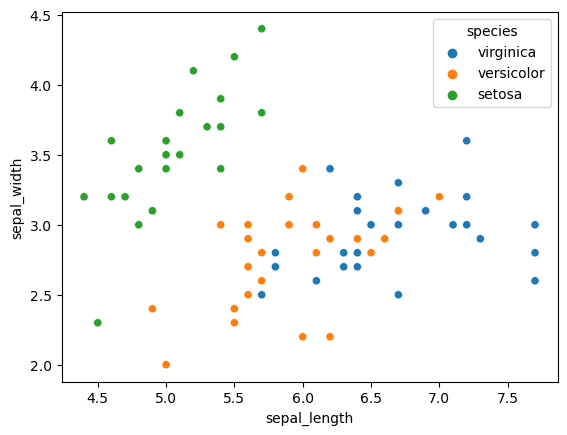

In [11]:
sns.scatterplot(data = train, x='sepal_length', y='sepal_width', hue='species')

## k-nearest neighbors model


[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)



#### Create KNN Object

In [12]:
knn = KNeighborsClassifier(n_neighbors = 1)

KNeighborsClassifier(n_neighbors=1)

#### Fit the Model to the Training Data

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Make Predictions

In [15]:
y_pred = knn.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
pd.Series(y_pred)

0      virginica
1     versicolor
2         setosa
3     versicolor
4         setosa
5      virginica
6      virginica
7     versicolor
8     versicolor
9         setosa
10    versicolor
11        setosa
12     virginica
13     virginica
14    versicolor
15        setosa
16     virginica
17        setosa
18     virginica
19     virginica
20    versicolor
21     virginica
22        setosa
23     virginica
24     virginica
25        setosa
26        setosa
27        setosa
28    versicolor
29        setosa
30    versicolor
31        setosa
32        setosa
33    versicolor
34        setosa
35     virginica
36        setosa
37     virginica
38     virginica
39     virginica
40     virginica
41     virginica
42    versicolor
43    versicolor
44        setosa
45    versicolor
46     virginica
47        setosa
48    versicolor
49        setosa
50        setosa
51     virginica
52        setosa
53     virginica
54    versicolor
55        setosa
56    versicolor
57     virginica
58        seto

#### Estimate Probability of the Prediction

In [19]:
y_pred_proba = knn.predict_proba(X_train)

TypeError: predict_proba() got an unexpected keyword argument 'labels'

In [18]:
y_pred_proba

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0

In [21]:
knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Evaluate Model

#### Compute the Accuracy

In [23]:
knn_accuracy = knn.score(X_train, y_train)
knn_accuracy

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9523809523809523

In [27]:
confusion_matrix(y_train, y_pred)


array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  3, 25]])

In [28]:
pd.crosstab(y_train, y_pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,28,0,0
versicolor,0,27,1
virginica,0,3,25


In [ ]:

In [40]:
rubric = pd.DataFrame(
    {'pred_0': ['True Positive', 'False Negative', 'False Negative'],
     'pred_1': ['False Positive', 'True Positive']
    }, index=['actual_0','actual_1']
)

#### Create a Classification Report

In [31]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.900000,0.961538,0.952381,0.953846,0.953846
recall,1.0,0.964286,0.892857,0.952381,0.952381,0.952381
f1-score,1.0,0.931034,0.925926,0.952381,0.952320,0.952320
support,28.0,28.000000,28.000000,0.952381,84.000000,84.000000


## Changing the k value

In [32]:
# set the number of neighbors, as well as a weight (certain datasets will affect the 
# determination)
knn5 = KNeighborsClassifier(n_neighbors = 5, weights='uniform')

In [33]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred5 = knn5.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.82      0.64      0.72        28
   virginica       0.71      0.86      0.77        28

    accuracy                           0.83        84
   macro avg       0.84      0.83      0.83        84
weighted avg       0.84      0.83      0.83        84



In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      0.96      0.93        28
   virginica       0.96      0.89      0.93        28

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



In [48]:
knn.score(X_train, y_pred)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [49]:
knn.score(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9523809523809523

## Finding the best value for k

In [51]:
# for knn
print(classification_report(y_validate, knn.predict(X_validate)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.75      0.75      0.75        12
   virginica       0.75      0.75      0.75        12

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
# for knn5
print(classification_report(y_validate, knn5.predict(X_validate)))

              precision    recall  f1-score   support

      setosa       0.92      1.00      0.96        12
  versicolor       0.78      0.58      0.67        12
   virginica       0.64      0.75      0.69        12

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.77        36
weighted avg       0.78      0.78      0.77        36



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
model_list = []
model_accuracies = {}

for i in range(1, 10):
    nknn = KNeighborsClassifier(n_neighbors = i)
    nknn.fit(X_train, y_train)
    model_accuracies[f'{i} - Neighbors'] = {
        'Train Score:': round(nknn.score(X_train, y_train), 2),
        'Validate Score:': round(nknn.score(X_validate, y_validate), 2)
    }

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [60]:
model_list

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=2),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=4),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=6),
 KNeighborsClassifier(n_neighbors=7),
 KNeighborsClassifier(n_neighbors=8),
 KNeighborsClassifier(n_neighbors=9)]

In [65]:
pd.DataFrame(model_accuracies).T

,Train Score:,Validate Score:
1 - Neighbors,0.95,0.83
2 - Neighbors,0.86,0.72
3 - Neighbors,0.88,0.75
4 - Neighbors,0.83,0.67
5 - Neighbors,0.83,0.78
6 - Neighbors,0.81,0.86
7 - Neighbors,0.83,0.83
8 - Neighbors,0.82,0.75
9 - Neighbors,0.81,0.81


## Moving forward

- We selected `sepal_length` and `sepal_width` as features. 
     - Build new models with different and/or additional features. 


- Tuning hyperparameters

    `'weights'`: Uniform weight is the default (all points are treated equally). 
    Switch to a distance-weighted approach where nearer neighbors are given more weight in the voting process
    
    `'algorithm'`: Large datasets use a sampling algorithm to save on computational cost. We can try different samplers. 
    
    `'metric'`: There is more than one way to measure distance


- There are very similar models that we can try e.g. `RadiusNeighborsClassifier`